In [32]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import arviz as az
import random
import pandas as pd

Loading the data...

In [5]:
centered_data = az.load_arviz_data("centered_eight")
non_centered_data = az.load_arviz_data("non_centered_eight")

-------------Exercise 1-------------

In [26]:
print(f" ~~~Centered data contents:~~~ \n{centered_data}\n")

 ~~~Centered data contents:~~~ 
Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> prior
	> observed_data



In [27]:
print(f" ~~~Centered data contents for posterior:~~~ \n{centered_data['posterior']}\n")

 ~~~Centered data contents for posterior:~~~ 
<xarray.Dataset>
Dimensions:  (chain: 4, draw: 500, school: 8)
Coordinates:
  * chain    (chain) int64 0 1 2 3
  * draw     (draw) int64 0 1 2 3 4 5 6 7 8 ... 492 493 494 495 496 497 498 499
  * school   (school) object 'Choate' 'Deerfield' ... "St. Paul's" 'Mt. Hermon'
Data variables:
    mu       (chain, draw) float64 -3.477 -2.456 -2.826 ... 4.597 5.899 0.1614
    theta    (chain, draw, school) float64 ...
    tau      (chain, draw) float64 3.73 2.075 3.703 4.146 ... 8.346 7.711 5.407
Attributes:
    created_at:                 2019-06-21T17:36:34.398087
    inference_library:          pymc3
    inference_library_version:  3.7



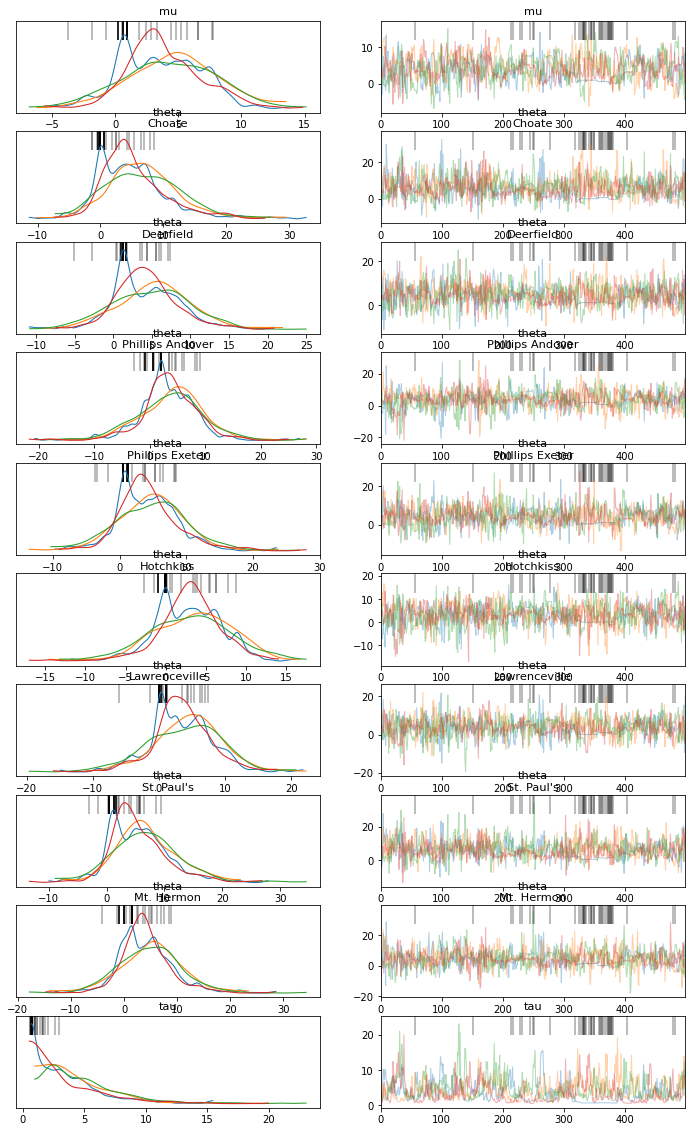

In [29]:
info = az.plot_trace(centered_data, divergences='top', compact=False)

As we can see, we have 4 different graphs of 4 different colors on each plot. Above we can also see that for generating the posterior distribution we used 4 chains, so we used 4 chains. Also, as for data dimensions we have "Dimensions:  (chain: 4, draw: 500, school: 8)", so we have sampled 500 samples. Because we used 4 chains, in total we sampled 2000 samples.

In [30]:
print(f" ~~~Non Centered data contents for posterior:~~~ \n{non_centered_data['posterior']}\n")

 ~~~Non Centered data contents for posterior:~~~ 
<xarray.Dataset>
Dimensions:  (chain: 4, draw: 500, school: 8)
Coordinates:
  * chain    (chain) int64 0 1 2 3
  * draw     (draw) int64 0 1 2 3 4 5 6 7 8 ... 492 493 494 495 496 497 498 499
  * school   (school) object 'Choate' 'Deerfield' ... "St. Paul's" 'Mt. Hermon'
Data variables:
    mu       (chain, draw) float64 ...
    theta_t  (chain, draw, school) float64 ...
    tau      (chain, draw) float64 ...
    theta    (chain, draw, school) float64 ...
Attributes:
    created_at:                 2019-06-21T17:36:37.382566
    inference_library:          pymc3
    inference_library_version:  3.7



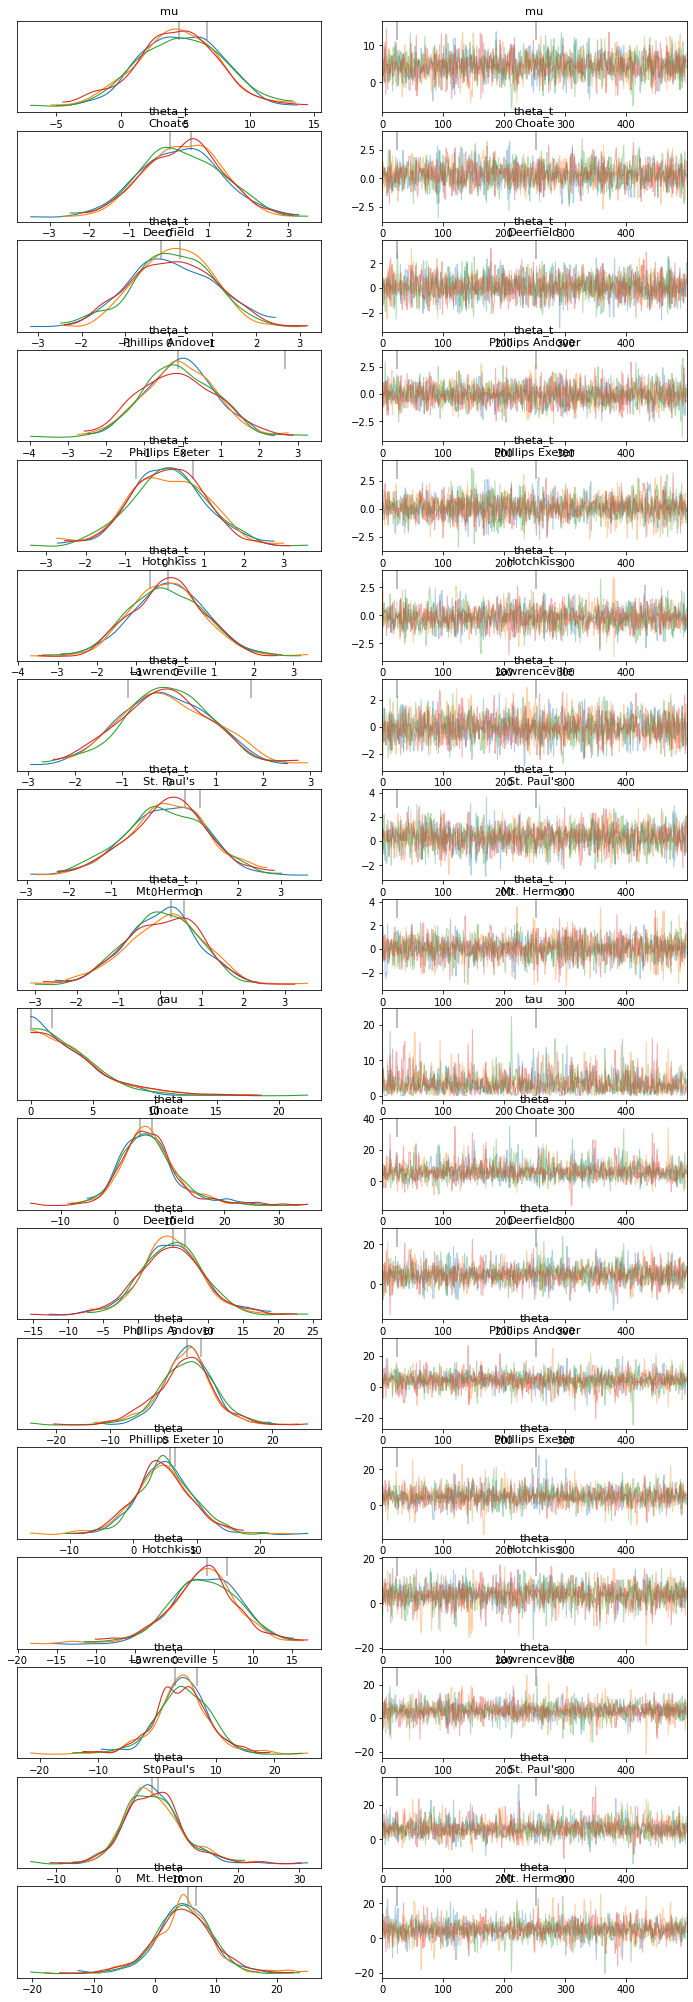

In [31]:
info = az.plot_trace(non_centered_data, divergences='top', compact=False)

As we can see, we have exactly the same number of draws and chains as stated for the centered model.

-------------Exercise 2-------------

In [35]:
summaries = pd.concat([az.summary(centered_data, var_names=['mu', 'tau']), 
                       az.summary(non_centered_data, var_names=['mu', 'tau'])])
summaries.index = ['centered_mu', 'centered_tau', 'non_centered_mu', 'non_centered_tau']
summaries

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
centered_mu,4.093,3.372,-2.118,10.403,0.215,0.152,250.0,643.0,1.03
centered_tau,4.089,3.001,0.569,9.386,0.252,0.178,79.0,54.0,1.07
non_centered_mu,4.494,3.286,-2.187,10.201,0.068,0.053,2354.0,1401.0,1.00
non_centered_tau,3.447,2.915,0.003,8.603,0.074,0.052,1268.0,900.0,1.00


As we can see, r_hat is the lowest for the non centered model, both for mu and tau. We should have r_hat lower than 1.1 in order to have convergency, here we have 1. Thus, the non centered model is the best.

Here we can also observe ess, which reflects autocorrelation. ess should be close to the sampled data size, here the non centered data is closer to 2000, having 2354.0 and 1268.0. On the other hand, the centered data has 250.0 and 79.0, which is farther from 2000.

Thus, having r_hat and ess best for the non centered data, the non centered model can be considered better than the centered one.

-------------Exercise 3-------------

In [52]:
centered_data.sample_stats.diverging.sum()

<xarray.DataArray 'diverging' ()>
array(43)

In [53]:
non_centered_data.sample_stats.diverging.sum()

<xarray.DataArray 'diverging' ()>
array(2)

As we can see, the centered data had 43 divergences and the non centered data had 2 divergences, significantly less than the centered data.

Text(0.5, 1.0, 'non-centered')

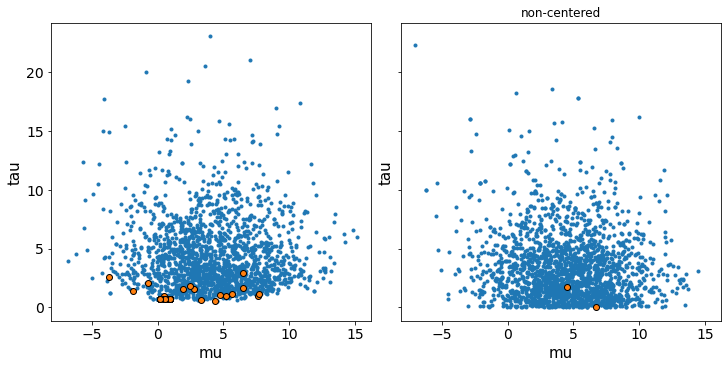

In [42]:
_, ax = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(10, 5),
constrained_layout=True)

for idx, tr in enumerate([centered_data, non_centered_data]):
    az.plot_pair(tr, var_names=['mu', 'tau'], kind='scatter',
                 divergences=True, divergences_kwargs={'color':'C1'}, 
                 ax=ax[idx])

ax[idx].set_title(['centered', 'non-centered'][idx])

The divergences for the centered model are a bit sparse, so they might be not a very big issue, however there are a lot of them. On the other hand, the non centered data has sparse divergences two, and much much less, so they would also not present an issue.